In [51]:
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
#plt.style.use('seaborn-poster')
sys.path.append('.')
pd.set_option('display.max_columns', None)

In [52]:
from analysis_support import *

# Halton Sequence, CP-SAT, Multi-edge ${\cal V}_k$ cuts

In [53]:
file_pattern = 'halton.cp_sat.multi_edge/lazy_prm_bc.BARN.instance_*.json'
# Halton results loading
vanilla_results = collect_deterministic_results(file_pattern)
table = tabulate_deterministic_results(vanilla_results)

Found 1500 result files
Missing results: 0


In [54]:
table

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_027,42,0,0,32,348,2,5.150895,0.014957,0.102182,1,True,10.440148,10.440148,10.420827,10.420827,5
1,BARN,instance_276,567,0,0,32,278,2,6.332786,0.009832,0.102896,1,True,11.688940,11.688940,11.728941,11.728941,6
2,BARN,instance_048,1,0,0,32,289,2,5.550095,0.008968,0.139215,1,True,10.743326,10.743326,10.930761,10.930761,4
3,BARN,instance_023,42,0,1,42,473,3,5.813791,0.027647,0.224546,2,True,10.145640,10.145640,10.163610,10.163610,5
4,BARN,instance_178,1337,0,0,32,272,2,2.904326,0.008525,0.174619,1,True,11.900562,11.900562,12.034209,12.034209,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,BARN,instance_041,42,0,0,32,347,2,5.150895,0.014940,0.043544,1,True,11.474006,11.474006,11.468859,11.468859,5
1496,BARN,instance_275,8193,1,0,42,477,3,6.009443,0.027719,0.253807,2,True,11.474006,10.328134,11.468859,10.333877,6
1497,BARN,instance_176,1,0,0,32,267,2,6.332786,0.011317,0.107252,1,True,11.619995,11.619995,11.637189,11.637189,6
1498,BARN,instance_005,1,0,1,42,476,3,8.389869,0.034574,0.047701,2,True,11.619995,11.619995,11.637189,11.637189,6


## Analysis

### Halton Sequence Sampling

In [55]:
multiple_iterations = table[table['iterations']>1]
multiple_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
3,BARN,instance_023,42,0,1,42,473,3,5.813791,0.027647,0.224546,2,True,10.145640,10.145640,10.163610,10.163610,5
5,BARN,instance_054,567,0,1,42,480,3,8.389869,0.033533,0.123526,2,True,10.145640,10.145640,10.163610,10.163610,5
7,BARN,instance_100,42,3,0,62,1005,5,3.449695,0.090302,0.525435,4,True,12.133635,11.649840,12.381374,11.680051,7
8,BARN,instance_114,8193,0,1,42,462,3,3.239333,0.023087,0.141953,2,True,10.067543,10.067543,10.063682,10.063682,6
9,BARN,instance_273,567,0,3,62,713,5,2.904326,0.068777,0.176343,4,True,10.314071,10.314071,10.349802,10.349802,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,BARN,instance_175,567,0,1,42,390,3,5.824401,0.020929,0.350754,2,True,10.145640,10.145640,10.163610,10.163610,5
1494,BARN,instance_239,1337,1,0,42,512,3,5.214743,0.027743,0.342420,2,True,10.456946,10.299002,10.425438,10.446020,6
1496,BARN,instance_275,8193,1,0,42,477,3,6.009443,0.027719,0.253807,2,True,11.474006,10.328134,11.468859,10.333877,6
1498,BARN,instance_005,1,0,1,42,476,3,8.389869,0.034574,0.047701,2,True,11.619995,11.619995,11.637189,11.637189,6


In [56]:
single_iterations = table[table['iterations']==1]
single_iterations

,domain,instance,seed,num_no_goods,num_cusp_no_goods,rgg_V,rgg_E,rgg_expansions,rgg_dispersion,plan_time,verif_time,iterations,safe,holonomic_cost_0,holonomic_cost_k,smooth_cost_0,smooth_cost_k,plan_length
0,BARN,instance_027,42,0,0,32,348,2,5.150895,0.014957,0.102182,1,True,10.440148,10.440148,10.420827,10.420827,5
1,BARN,instance_276,567,0,0,32,278,2,6.332786,0.009832,0.102896,1,True,11.688940,11.688940,11.728941,11.728941,6
2,BARN,instance_048,1,0,0,32,289,2,5.550095,0.008968,0.139215,1,True,10.743326,10.743326,10.930761,10.930761,4
4,BARN,instance_178,1337,0,0,32,272,2,2.904326,0.008525,0.174619,1,True,11.900562,11.900562,12.034209,12.034209,6
6,BARN,instance_045,8193,0,0,32,309,2,5.150895,0.009993,0.101617,1,True,11.474006,11.474006,11.468859,11.468859,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,BARN,instance_276,42,0,0,32,278,2,6.332786,0.010050,0.100974,1,True,11.688940,11.688940,11.728941,11.728941,6
1492,BARN,instance_231,1337,0,0,32,306,2,6.332786,0.008217,0.301103,1,True,10.360349,10.360349,10.351744,10.351744,4
1493,BARN,instance_291,1,0,0,32,334,2,5.150895,0.015302,0.085953,1,True,10.360349,10.360349,10.351744,10.351744,4
1495,BARN,instance_041,42,0,0,32,347,2,5.150895,0.014940,0.043544,1,True,11.474006,11.474006,11.468859,11.468859,5


In [57]:
multiple_iterations['iterations'].describe()

count    930.000000
mean       3.232258
std        2.101778
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       23.000000
Name: iterations, dtype: float64

In [58]:
multiple_iterations[['instance', 'seed', 'iterations']].sort_values('iterations', ascending=False).head(20)[['instance', 'seed', 'iterations']]

,instance,seed,iterations
268,instance_160,1337,23
1109,instance_120,567,23
1241,instance_202,1337,16
1050,instance_241,8193,14
977,instance_278,1,14
1084,instance_244,567,14
1428,instance_264,1337,14
557,instance_103,8193,14
577,instance_156,1337,12
148,instance_261,42,11


In [59]:
multiple_expansions = multiple_iterations.query('rgg_expansions > 1')
multiple_expansions[['instance', 'seed', 'rgg_expansions', 'rgg_expansions', 'rgg_V', 'rgg_E', 'rgg_dispersion']]

,instance,seed,rgg_expansions,rgg_expansions,rgg_V,rgg_E,rgg_dispersion
3,instance_023,42,3,3,42,473,5.813791
5,instance_054,567,3,3,42,480,8.389869
7,instance_100,42,5,5,62,1005,3.449695
8,instance_114,8193,3,3,42,462,3.239333
9,instance_273,567,5,5,62,713,2.904326
...,...,...,...,...,...,...,...
1491,instance_175,567,3,3,42,390,5.824401
1494,instance_239,1337,3,3,42,512,5.214743
1496,instance_275,8193,3,3,42,477,6.009443
1498,instance_005,1,3,3,42,476,8.389869


In [60]:
multiple_expansions['rgg_V'].describe()

count    930.000000
mean      54.322581
std       21.017785
min       42.000000
25%       42.000000
50%       42.000000
75%       62.000000
max      252.000000
Name: rgg_V, dtype: float64

In [61]:
multiple_expansions['rgg_E'].describe()

count     930.000000
mean      756.129032
std       624.074207
min       309.000000
25%       459.000000
50%       582.000000
75%       828.000000
max      9367.000000
Name: rgg_E, dtype: float64

In [62]:
collision_set = multiple_iterations.query('num_no_goods > 1')
collision_set[['instance', 'seed', 'num_no_goods']]

,instance,seed,num_no_goods
7,instance_100,42,3
20,instance_125,42,2
21,instance_076,567,3
66,instance_243,8193,2
73,instance_280,1337,2
...,...,...,...
1457,instance_244,1,6
1465,instance_217,1337,2
1482,instance_242,42,2
1486,instance_015,1,2


In [63]:
curvature_set = multiple_iterations.query('num_cusp_no_goods > 1')
curvature_set[['instance', 'seed', 'num_cusp_no_goods']]

,instance,seed,num_cusp_no_goods
9,instance_273,567,3
28,instance_124,1337,2
30,instance_260,42,2
32,instance_105,567,5
64,instance_183,1337,4
...,...,...,...
1449,instance_171,1337,2
1451,instance_255,1337,5
1457,instance_244,1,4
1466,instance_120,1337,5


In [64]:
time_data = table[['instance', 'seed', 'plan_time', 'verif_time']]
time_data

,instance,seed,plan_time,verif_time
0,instance_027,42,0.014957,0.102182
1,instance_276,567,0.009832,0.102896
2,instance_048,1,0.008968,0.139215
3,instance_023,42,0.027647,0.224546
4,instance_178,1337,0.008525,0.174619
...,...,...,...,...
1495,instance_041,42,0.014940,0.043544
1496,instance_275,8193,0.027719,0.253807
1497,instance_176,1,0.011317,0.107252
1498,instance_005,1,0.034574,0.047701


In [65]:
time_data['plan_time'].describe()

count    1500.000000
mean        0.060346
std         0.196122
min         0.005788
25%         0.011640
50%         0.027060
75%         0.047102
max         4.901797
Name: plan_time, dtype: float64

In [66]:
time_data['verif_time'].describe()

count    1500.000000
mean        0.214871
std         0.194181
min         0.021776
25%         0.110826
50%         0.166677
75%         0.258688
max         4.201668
Name: verif_time, dtype: float64

In [67]:
plan_times = [row['plan_time'] for _, row in time_data.iterrows()]
verif_times = [row['verif_time'] for _, row in time_data.iterrows()]

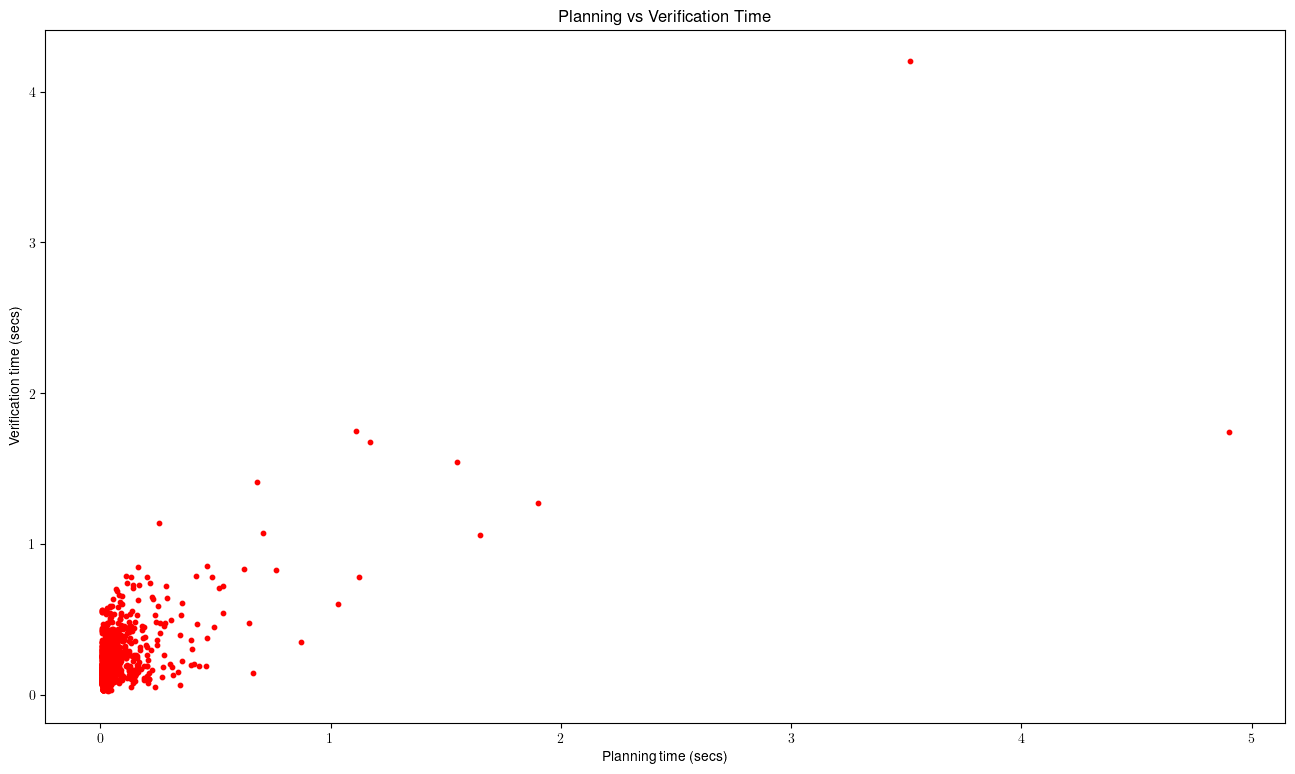

In [68]:
plt.figure(figsize = (16,9))
plt.scatter(plan_times, verif_times, s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Planning vs Verification Time')
plt.xlabel('Planning time (secs)')
plt.ylabel('Verification time (secs)')
plt.show()

In [69]:
plan_verif_ratio = time_data['plan_time'] / time_data['verif_time']

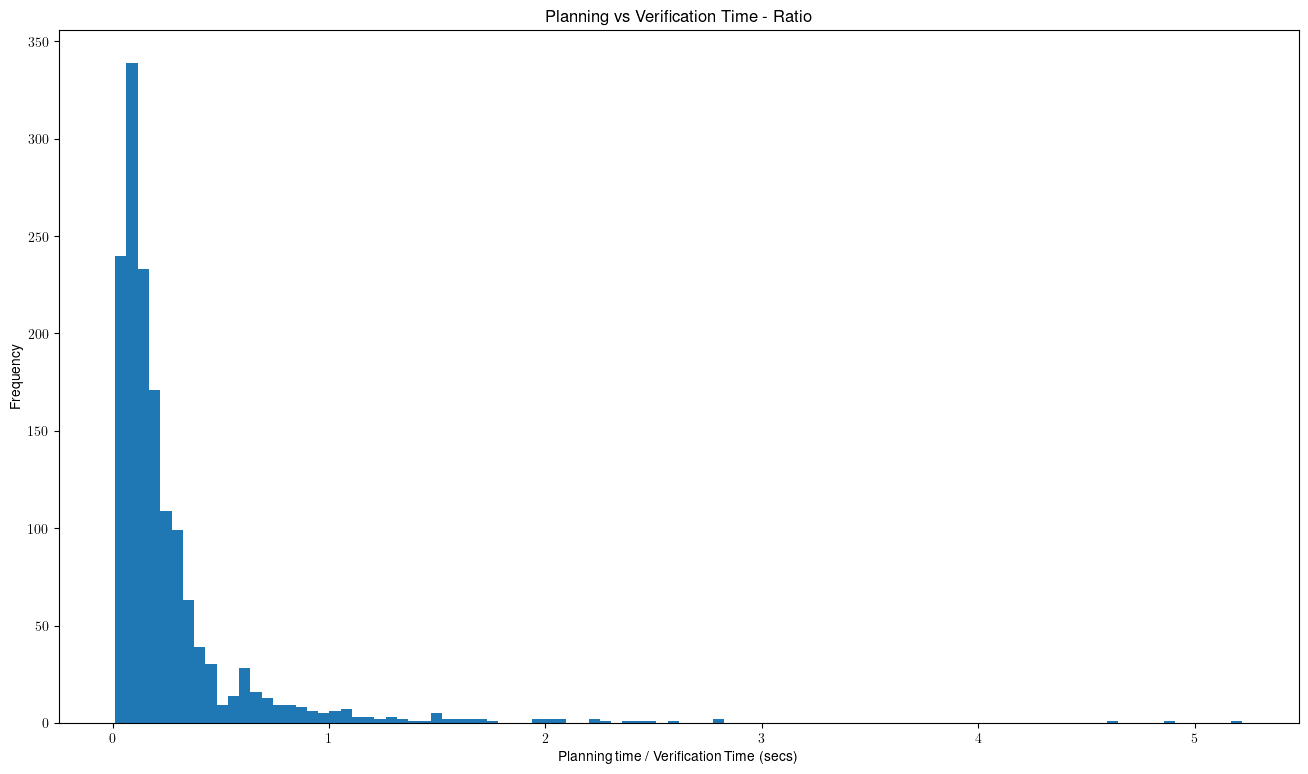

In [70]:
fig, axs = plt.subplots(figsize = (16,9))

axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [71]:
time_data_multiple_iterations = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations > 1')
time_data_single_iteration = table[['instance', 'seed', 'iterations', 'plan_time', 'verif_time']].query('iterations == 1')

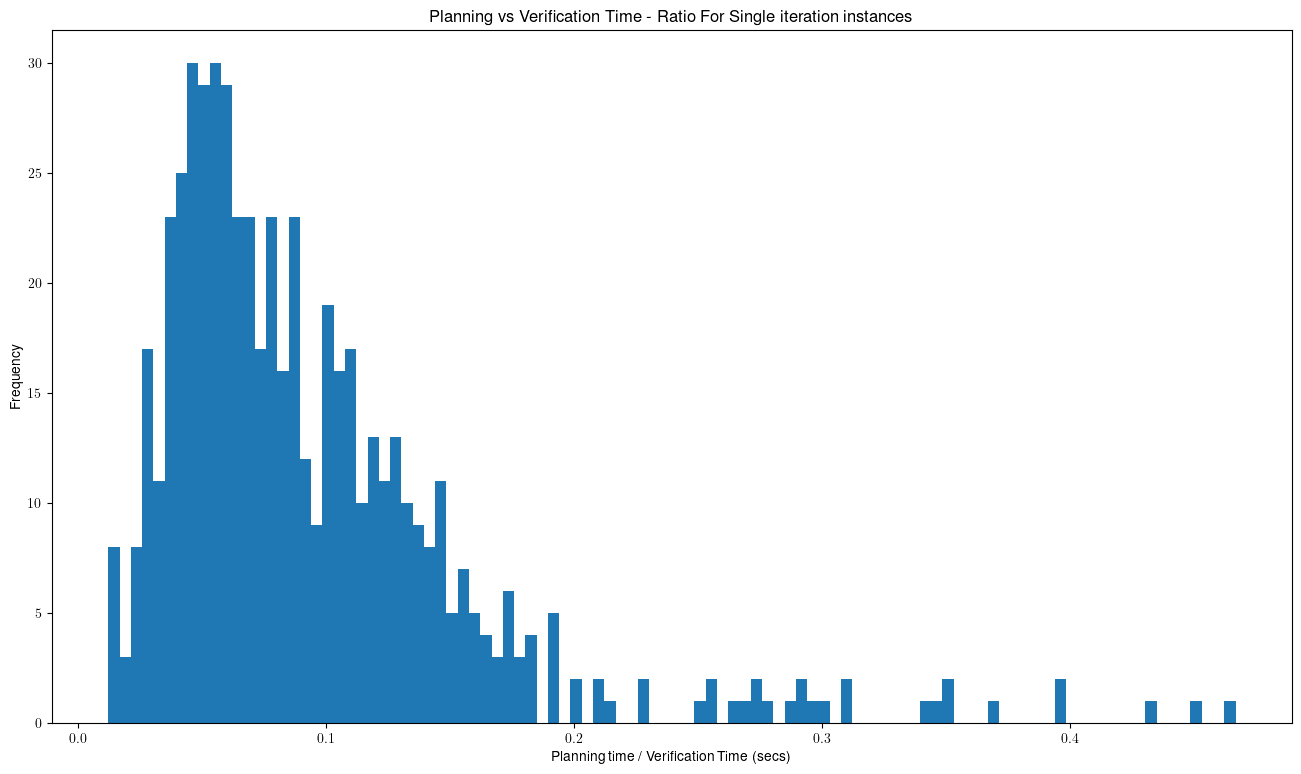

In [72]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_single_iteration['plan_time'] / time_data_single_iteration['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Single iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

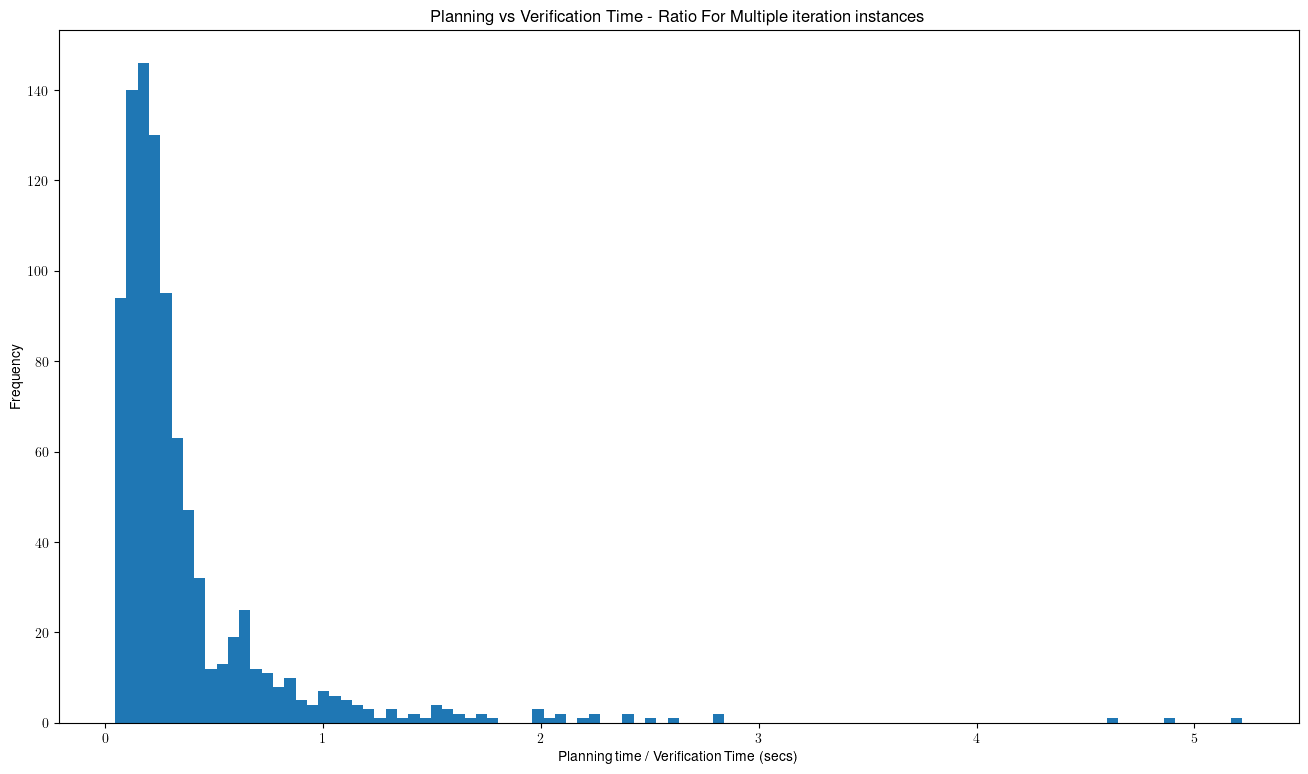

In [73]:
fig, axs = plt.subplots(figsize = (16,9))

plan_verif_ratio = time_data_multiple_iterations['plan_time'] / time_data_multiple_iterations['verif_time']
axs.hist(plan_verif_ratio, bins=100)


plt.title('Planning vs Verification Time - Ratio For Multiple iteration instances')
plt.xlabel('Planning time / Verification Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [74]:
total_time_single_iteration = time_data_single_iteration['plan_time'] + time_data_single_iteration['verif_time']

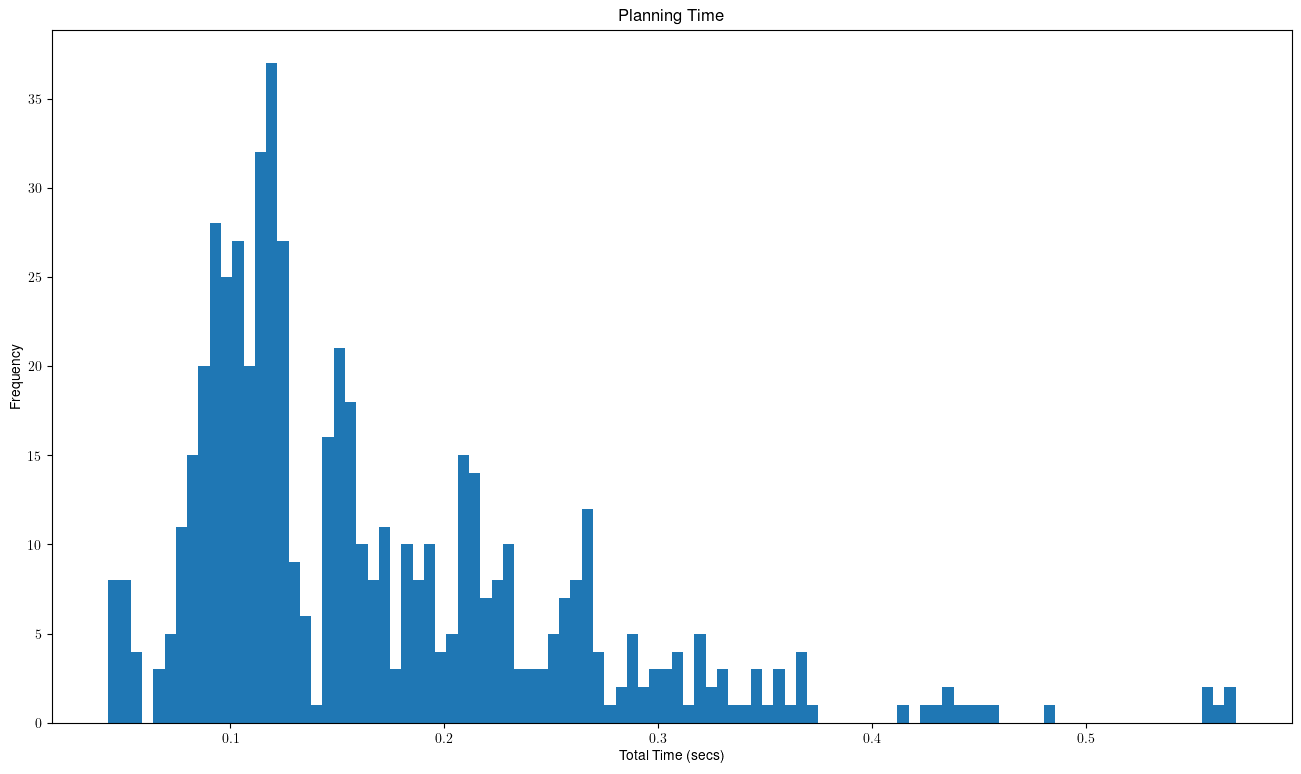

In [75]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_single_iteration, bins=100)

plt.title('Planning Time')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [76]:
total_time_multiple_iterations = time_data_multiple_iterations['plan_time'] + time_data_multiple_iterations['verif_time']

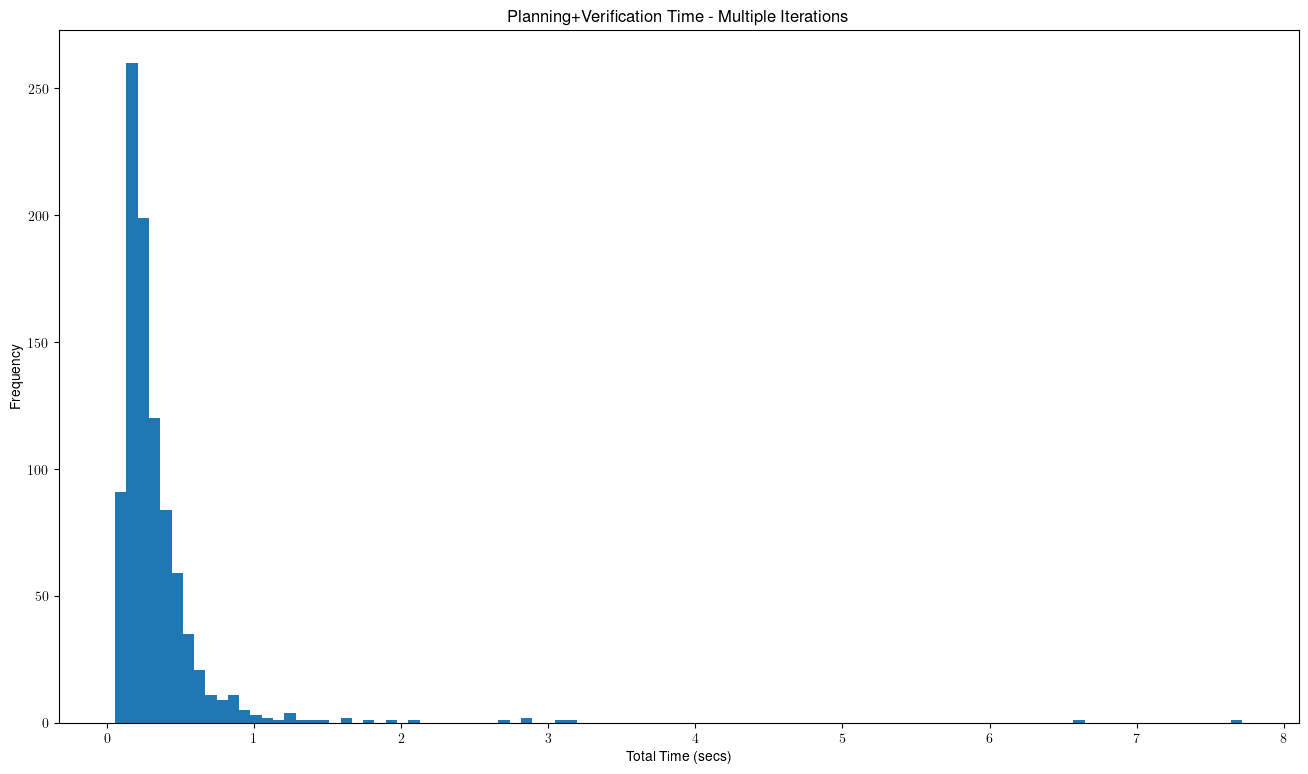

In [77]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(total_time_multiple_iterations, bins=100)

plt.title('Planning+Verification Time - Multiple Iterations')
plt.xlabel('Total Time (secs)')
plt.ylabel('Frequency')
plt.show()

In [78]:
table[['holonomic_cost_k']]

,holonomic_cost_k
0,10.440148
1,11.688940
2,10.743326
3,10.145640
4,11.900562
...,...
1495,11.474006
1496,10.328134
1497,11.619995
1498,11.619995


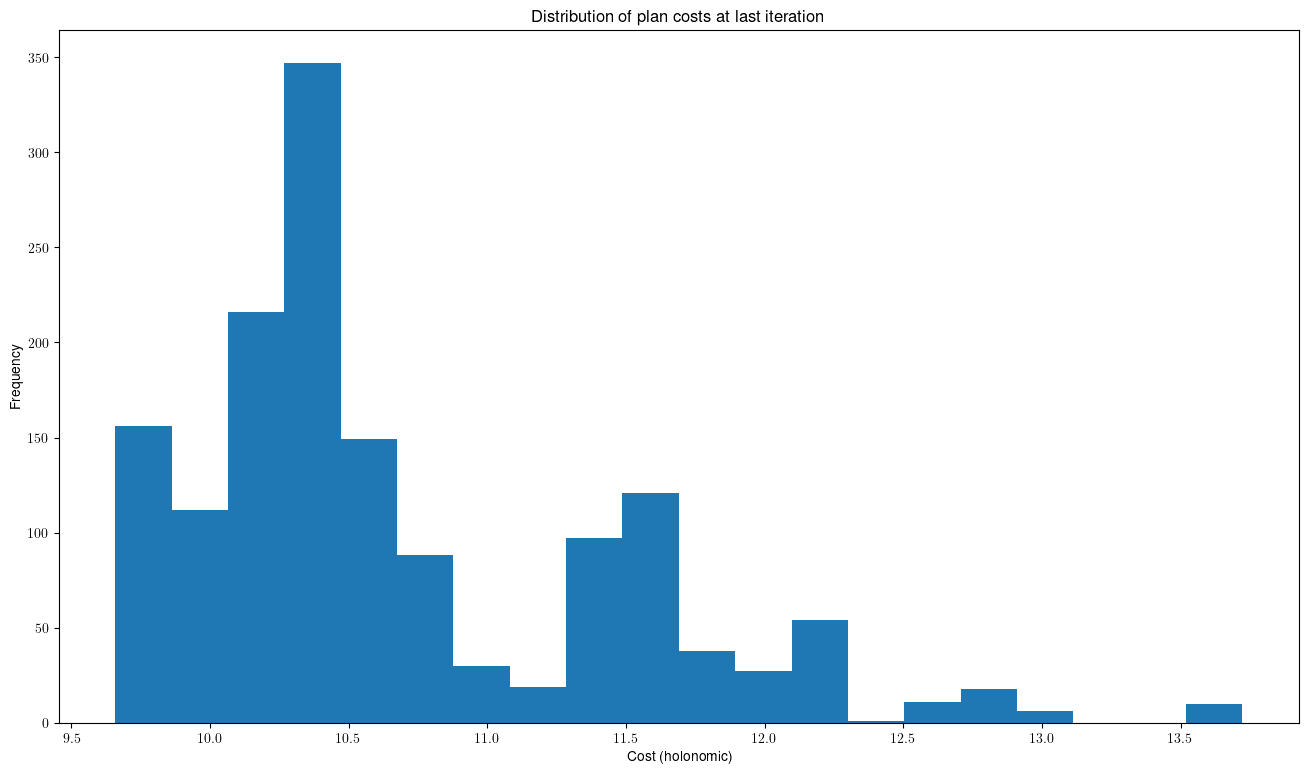

In [79]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(table[['holonomic_cost_k']].to_numpy(), bins=20)

plt.title('Distribution of plan costs at last iteration')
plt.xlabel('Cost (holonomic)')
plt.ylabel('Frequency')
plt.show()

In [80]:
holonomic_cost_diff = multiple_iterations['holonomic_cost_k'] - multiple_iterations['holonomic_cost_0']
holonomic_cost_diff

3       0.000000
5       0.000000
7      -0.483794
8       0.000000
9       0.000000
          ...   
1491    0.000000
1494   -0.157944
1496   -1.145871
1498    0.000000
1499    0.000000
Length: 930, dtype: float64

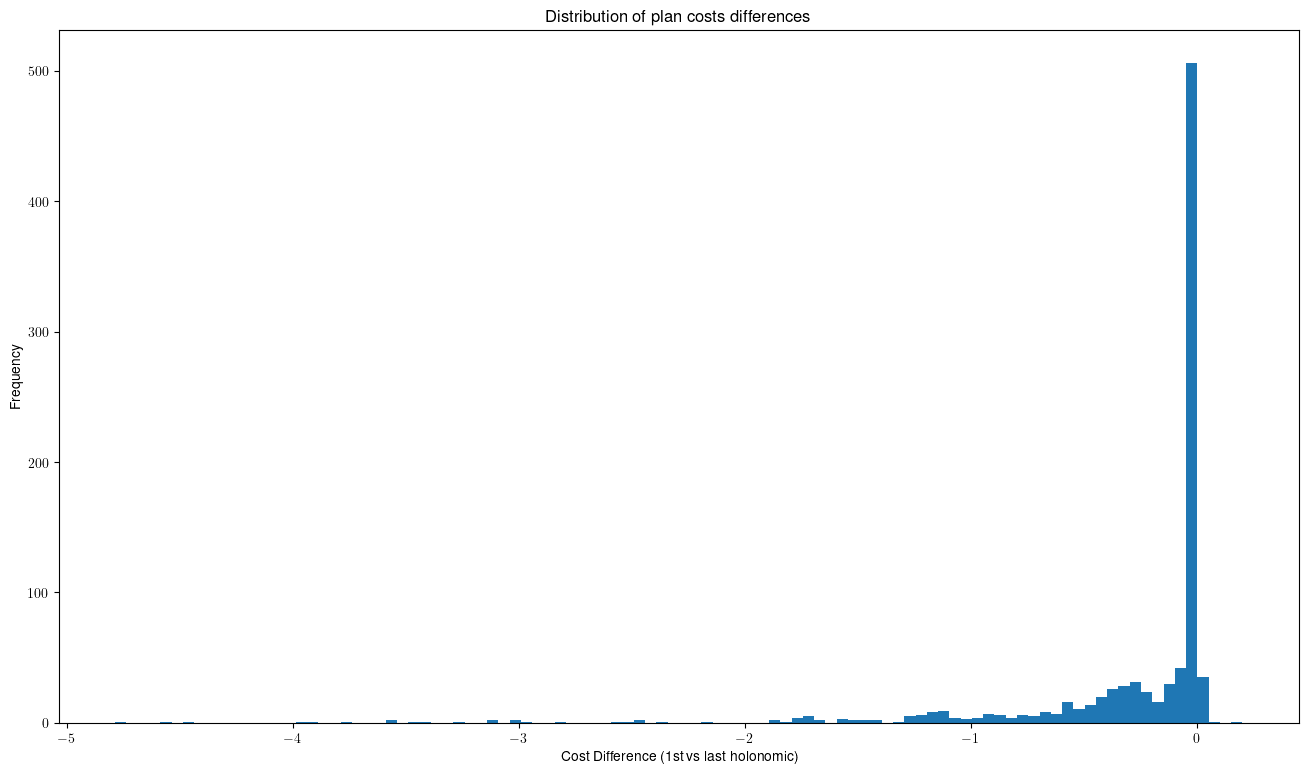

In [81]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(holonomic_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of plan costs differences')
plt.xlabel('Cost Difference (1st vs last holonomic)')
plt.ylabel('Frequency')
plt.show()

In [82]:
smooth_cost_diff = table['smooth_cost_k'] - table['smooth_cost_0']
smooth_cost_diff

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1495    0.000000
1496   -1.134981
1497    0.000000
1498    0.000000
1499    0.000000
Length: 1500, dtype: float64

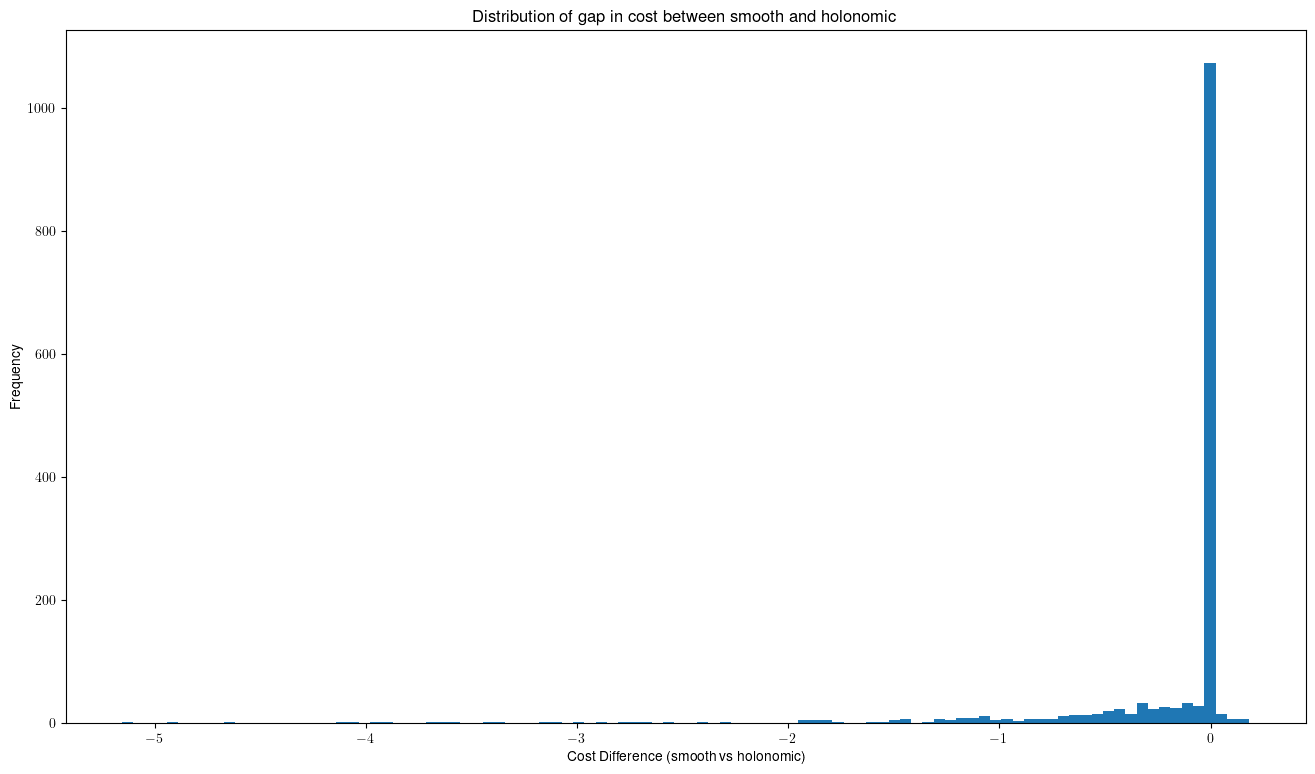

In [83]:
fig, axs = plt.subplots(figsize=(16, 9))

axs.hist(smooth_cost_diff.to_numpy(), bins=100)

plt.title('Distribution of gap in cost between smooth and holonomic')
plt.xlabel('Cost Difference (smooth vs holonomic)')
plt.ylabel('Frequency')
plt.show()

In [84]:
time_vs_plan_len = table[['instance', 'seed', 'plan_time', 'verif_time', 'plan_length']]
time_vs_plan_len

,instance,seed,plan_time,verif_time,plan_length
0,instance_027,42,0.014957,0.102182,5
1,instance_276,567,0.009832,0.102896,6
2,instance_048,1,0.008968,0.139215,4
3,instance_023,42,0.027647,0.224546,5
4,instance_178,1337,0.008525,0.174619,6
...,...,...,...,...,...
1495,instance_041,42,0.014940,0.043544,5
1496,instance_275,8193,0.027719,0.253807,6
1497,instance_176,1,0.011317,0.107252,6
1498,instance_005,1,0.034574,0.047701,6


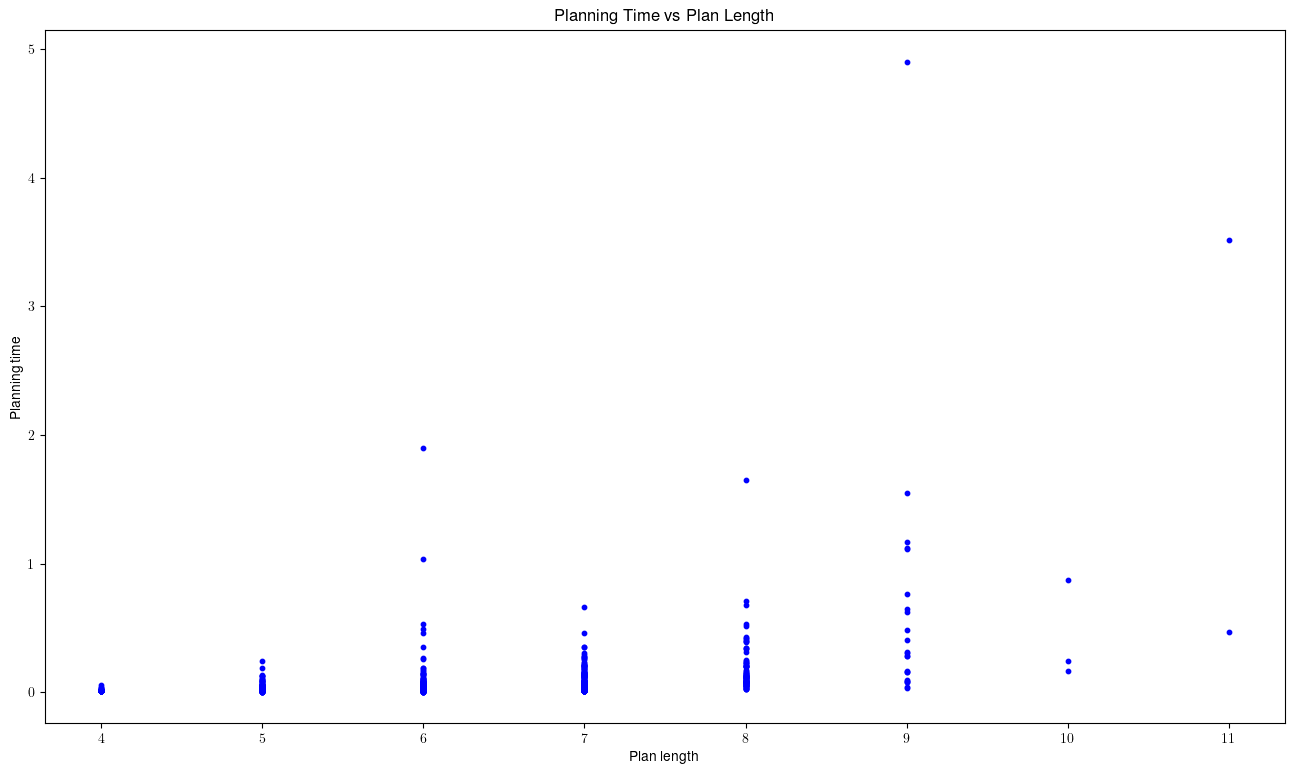

In [85]:
plt.figure(figsize = (16,9))
plan_times = time_vs_plan_len['plan_time'].to_numpy()
plan_length = time_vs_plan_len['plan_length'].to_numpy()
plt.scatter(plan_length, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Plan Length')
plt.xlabel('Plan length')
plt.ylabel('Planning time')
plt.show()

In [86]:
time_vs_no_goods = table[['instance', 'seed', 'plan_time', 'verif_time', 'num_no_goods', 'num_cusp_no_goods']]
time_vs_no_goods

,instance,seed,plan_time,verif_time,num_no_goods,num_cusp_no_goods
0,instance_027,42,0.014957,0.102182,0,0
1,instance_276,567,0.009832,0.102896,0,0
2,instance_048,1,0.008968,0.139215,0,0
3,instance_023,42,0.027647,0.224546,0,1
4,instance_178,1337,0.008525,0.174619,0,0
...,...,...,...,...,...,...
1495,instance_041,42,0.014940,0.043544,0,0
1496,instance_275,8193,0.027719,0.253807,1,0
1497,instance_176,1,0.011317,0.107252,0,0
1498,instance_005,1,0.034574,0.047701,0,1


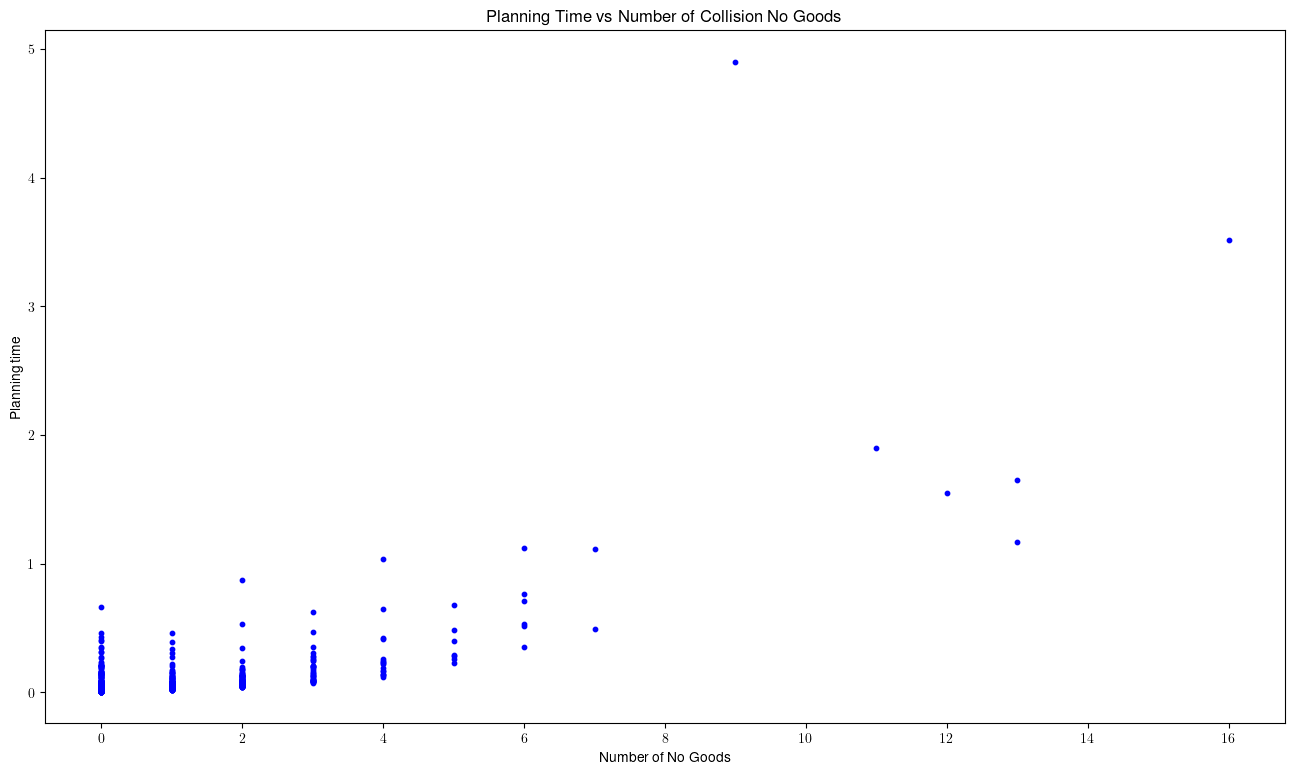

In [87]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Collision No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

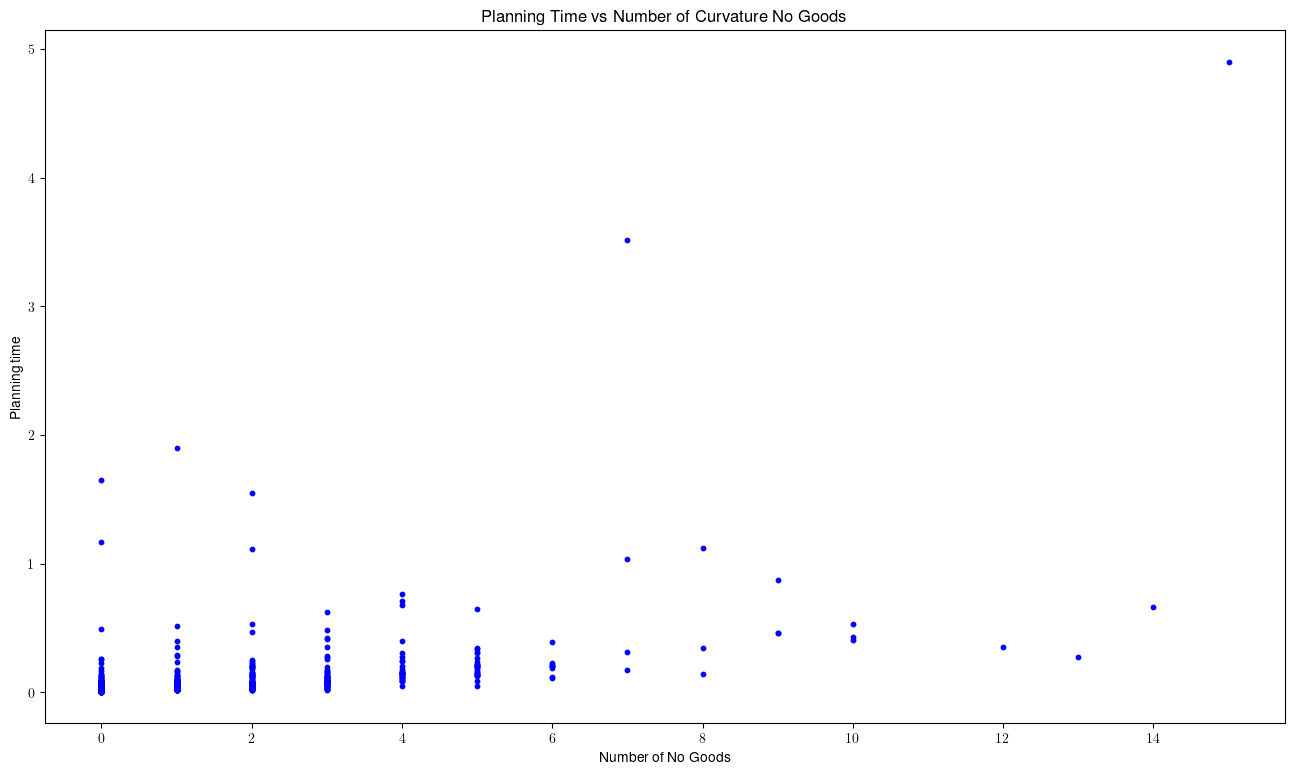

In [88]:
plt.figure(figsize = (16,9))
plan_times = time_vs_no_goods['plan_time'].to_numpy()
number_of_nogoods = time_vs_no_goods['num_cusp_no_goods'].to_numpy()
plt.scatter(number_of_nogoods, plan_times, s=10, marker='o', color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Number of No Goods')
plt.ylabel('Planning time')
plt.show()

In [89]:
time_breakpoints = [0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0]

In [90]:
coverage_at_breakpoint = np.zeros(len(time_breakpoints), dtype=int)

for i in range(len(plan_times)):
    for j in range(len(time_breakpoints)):
        if plan_times[i] <= time_breakpoints[j]:
            coverage_at_breakpoint[j] += 1
print("[{}]".format(", ".join(str(v) for v in coverage_at_breakpoint)))

[0, 247, 1147, 1336, 1481, 1491, 1500, 1500, 1500, 1500, 1500]


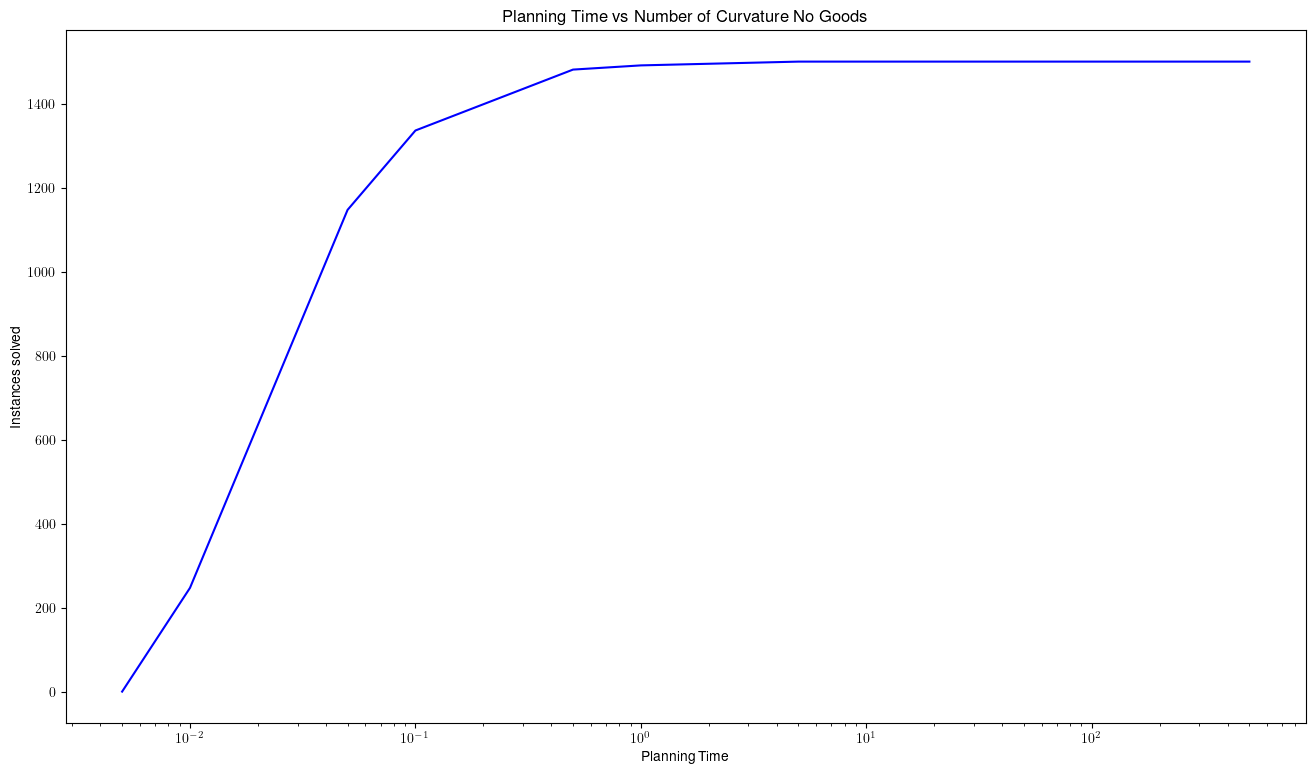

In [91]:
plt.figure(figsize = (16,9))
plt.plot(time_breakpoints, coverage_at_breakpoint, color='blue')
plt.title('Planning Time vs Number of Curvature No Goods')
plt.xlabel('Planning Time')
plt.xscale('log')
plt.ylabel('Instances solved')
plt.show()

#### Analysis w.r.t. BARN Metrics

In [92]:
file_pattern = '../BARN/instance*.json'
metadata_BARN = collect_instance_metadata(file_pattern)
metadata_table = tabulate_instance_metadata(metadata_BARN)

Found metadata for 300 instances


In [93]:
total_time_table = table[['instance', 'seed', 'iterations', 'num_no_goods', 'num_cusp_no_goods', 'plan_time', 'verif_time']]

In [94]:
total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']

/tmp/ipykernel_10182/4224517660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_table['total_time'] = total_time_table['plan_time'] + total_time_table['verif_time']


In [95]:
total_time_table

,instance,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time
0,instance_027,42,1,0,0,0.014957,0.102182,0.117139
1,instance_276,567,1,0,0,0.009832,0.102896,0.112728
2,instance_048,1,1,0,0,0.008968,0.139215,0.148183
3,instance_023,42,2,0,1,0.027647,0.224546,0.252193
4,instance_178,1337,1,0,0,0.008525,0.174619,0.183144
...,...,...,...,...,...,...,...,...
1495,instance_041,42,1,0,0,0.014940,0.043544,0.058484
1496,instance_275,8193,2,1,0,0.027719,0.253807,0.281526
1497,instance_176,1,1,0,0,0.011317,0.107252,0.118569
1498,instance_005,1,2,0,1,0.034574,0.047701,0.082274


In [96]:
metadata_table

,instance,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
0,instance_157,1.765225,4.795159,4.974359,2.196642,1.524747
1,instance_142,3.144283,8.739424,2.687500,8.123383,1.126505
2,instance_040,4.737938,10.563817,2.000000,10.798692,1.077837
3,instance_197,1.937390,5.563366,4.709677,3.306763,1.065729
4,instance_296,1.560408,4.109565,4.342857,1.518347,1.248066
...,...,...,...,...,...,...
295,instance_194,1.235520,3.674314,4.437500,0.928998,1.099499
296,instance_252,3.160814,7.436131,3.225806,5.575897,1.054628
297,instance_271,1.813977,4.232665,4.285714,2.477100,1.183793
298,instance_272,1.359000,4.062666,4.193548,1.254822,1.037314


In [97]:
metadata_cmp = total_time_table.set_index('instance').join(metadata_table.set_index('instance'), on=['instance'])
metadata_cmp

,seed,iterations,num_no_goods,num_cusp_no_goods,plan_time,verif_time,total_time,distance_closest_obstacle,average_visibility,dispersion,characterisitic_dimensions,tortuosity
instance,,,,,,,,,,,,
instance_027,42,1,0,0,0.014957,0.102182,0.117139,3.755163,8.416384,3.483871,8.648240,1.072174
instance_276,567,1,0,0,0.009832,0.102896,0.112728,1.413395,3.557706,4.358974,1.438787,1.198630
instance_048,1,1,0,0,0.008968,0.139215,0.148183,2.300700,5.645313,4.937500,3.344131,1.099499
instance_023,42,2,0,1,0.027647,0.224546,0.252193,2.741757,6.269548,4.303030,5.013291,1.114400
instance_178,1337,1,0,0,0.008525,0.174619,0.183144,1.977438,4.130887,5.225806,2.495334,1.168442
...,...,...,...,...,...,...,...,...,...,...,...,...
instance_041,42,1,0,0,0.014940,0.043544,0.058484,4.814285,9.728182,2.516129,10.490816,1.119130
instance_275,8193,2,1,0,0.027719,0.253807,0.281526,1.182267,2.918721,3.741935,0.763124,1.070780
instance_176,1,1,0,0,0.011317,0.107252,0.118569,1.898186,4.571165,5.032258,2.707778,1.065729


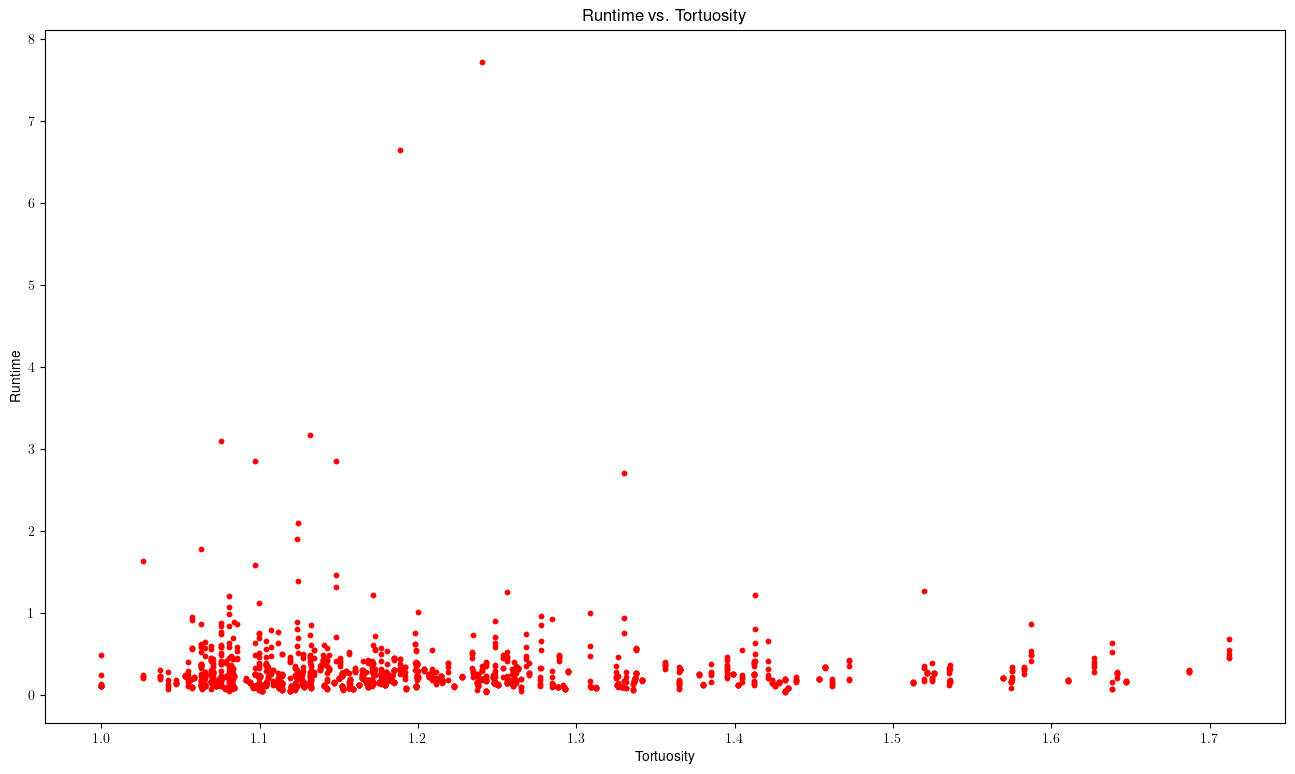

In [98]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['plan_time'] + metadata_cmp['verif_time'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Runtime')
plt.show()

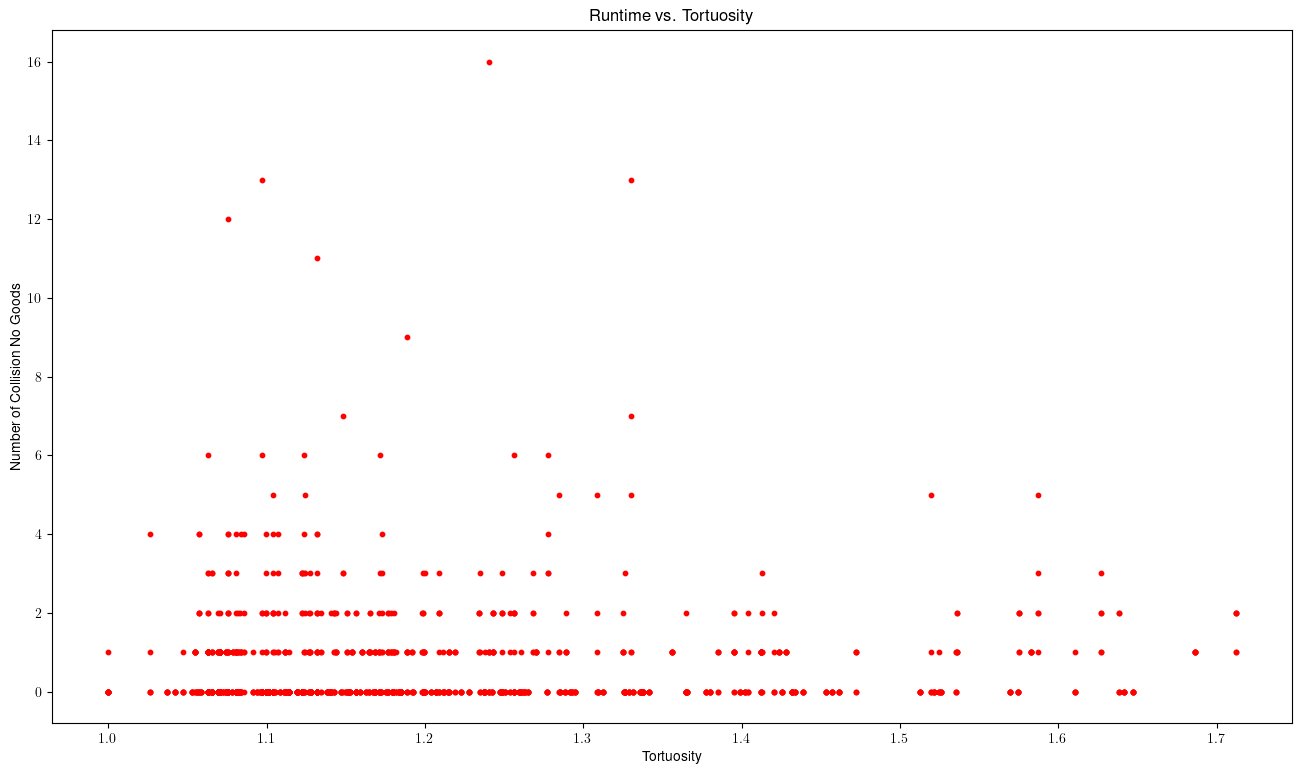

In [99]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()

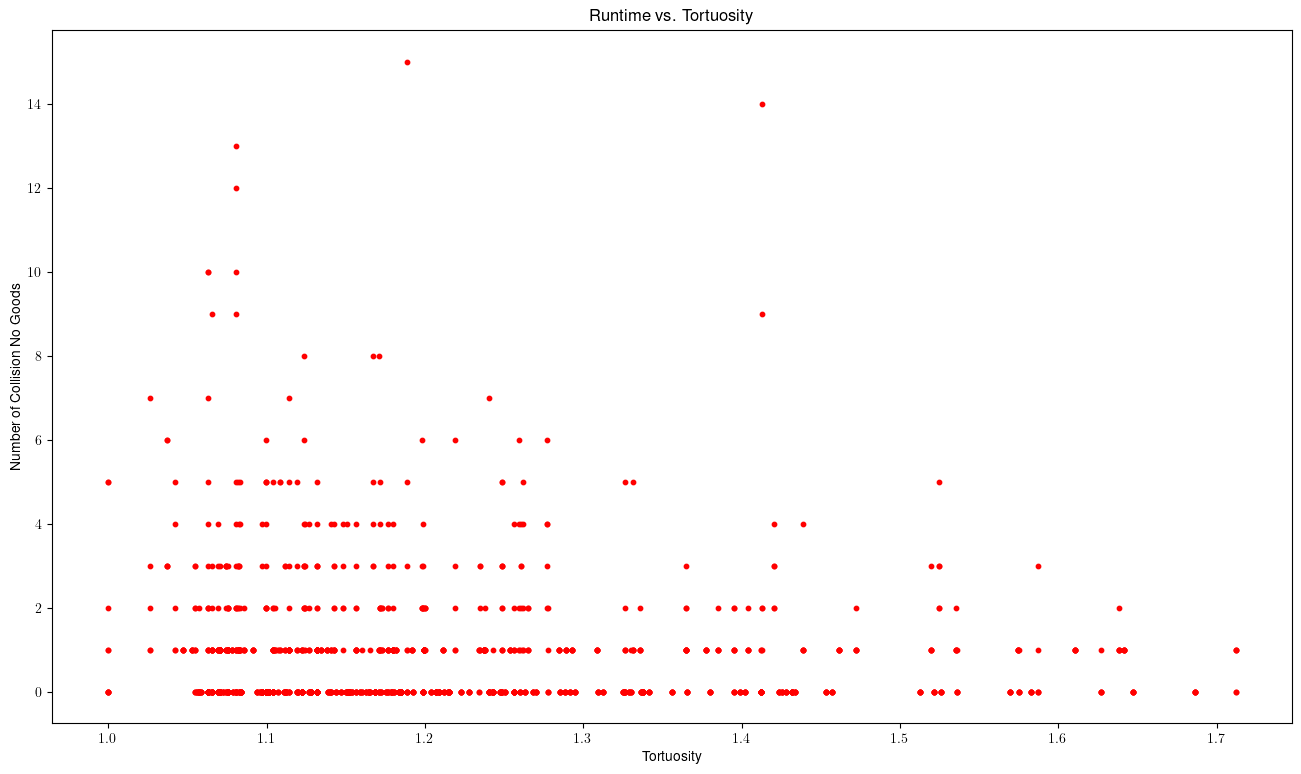

In [100]:
plt.figure(figsize = (16,9))
plt.scatter(metadata_cmp['tortuosity'], metadata_cmp['num_cusp_no_goods'],  s=10, marker='o', color='red')
#plt.scatter(instance_index, cost_0, s=10, marker='*', color='blue')
plt.title('Runtime vs. Tortuosity')
plt.xlabel('Tortuosity')
plt.ylabel('Number of Collision No Goods')
plt.show()